# ESSC 4510 Statistical and data analysis for Earth System Science

## Chapter 4 The power of linear models

The following are the sample codes for the tutorial in the lecture and the book *Environmental Data Analysis with MATLAB*



Modified by Jinping and Jeremy @2021-02

In [ ]:
# eda04_00 clear all variables and import vatious modules
%reset -f
import os; from datetime import date; import numpy as np
from math import exp, pi, sin, sqrt, floor, ceil
import scipy.linalg as la
from matplotlib import pyplot as plt; import matplotlib.cm as cm ; from matplotlib.colors import ListedColormap

# eda_draw function makes a "pictorial matrix equation"
# arguments are vectors, matrices and strings
# which are plotted in the order that the appear
# except that strings starting with 'title ' are plotted
# under the subseqeunt matrix or vector
# always returns a status of 1

def eda_draw(*argv):
    bw = np.zeros((256,4));
    v = 0.9*(256 - np.linspace( 0, 255, 256 ))/255;
    bw[:,0], bw[:,1], bw[:,2], bw[:,3] = v, v, v, np.ones(256);
    bwcmap = ListedColormap(bw);
    # size of plot
    W = 16; H = 4;
    fig1 = plt.figure(1);
    # figsize width and height in inches
    fig1.set_size_inches(W,H);
    ax1 = plt.subplot(1,1,1);
    plt.axis([0, W, -H/2, H/2]);
    plt.axis('off');
    LM = W/6;    # matrix width and heoght
    LV = W/40;   # vector width
    FS = 0.12;    # character width
    TO = 0.4;    # title vertical offset
    SP = 0.2;    # space between objects
    LS = 0.2;    # leading space
    p = LS; # starting x-position
    istitle=0; # flags presence of a title
    for a in argv:
        if isinstance(a,np.ndarray):
            sh = np.shape(a);
            if len(sh) == 1:  # conversion to nx1 array
                n = sh[0];
                m = 1;
                ap = a;
                a = np.zeros((n,1));
                a[:,0] = ap;
            else:
                n = sh[0]; m = sh[1];
            if m==1:
                pold=p;
                left=p; right=p+LV; bottom=-LM/2; top=LM/2;
                plt.imshow( a, cmap=bwcmap, vmin=np.min(a), vmax=np.max(a), extent=(left,right,bottom,top) );
                p = p+LV; pm = (p+pold)/2;
                if istitle:
                    plt.text(pm,-(LM/2)-TO,titlestr,horizontalalignment='center');
                    istitle=0;
                p = p+SP;
            else:
                pold=p; left=p; right=p+LM; bottom=-LM/2; top=LM/2;
                plt.imshow( a, cmap=bwcmap, vmin=np.min(a), vmax=np.max(a), extent=(left,right,bottom,top) );
                p = p+LM; pm = (p+pold)/2;
                if istitle:
                    plt.text(pm,-(LM/2)-TO,titlestr,horizontalalignment='center');
                    istitle=0;
                p = p+SP;
        elif isinstance(a,str):
            ns = len(a);
            istitle=0;
            if( ns>=6 ):
                if 'title ' in a[0:6]:
                    istitle=1;
                    titlestr=a[6:];
            if( istitle != 1):
                plt.text(p,0,a);
                p = p + ns*FS + SP;
    plt.show();
    return 1;

### 4.3 Curve Fitting

#### 4.3.1 Straight Line function

Considering a simplest case of a straigt line or data scattered along a straight line. The data are assumed to satisfy the  relationship:

  $$d_i = m_1 + m_2 x_i$$
  
Therefore the full representation and data kernal **G** be as following,

$$\begin{bmatrix} d_1 \\ d_2 \\ ...\\d_N \end{bmatrix} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ ...\\1 & x_N \end{bmatrix} \begin{bmatrix} m_1 \\ m_2  \end{bmatrix}$$

Here $m_1$ and $m_2$ is the intercept and the slope of the line respectively. In order for this relationship to be linear in the form, the data kernal **G** must not contain any data or model data. Thus, we assume that the x_n are either model parameters nor data, but rather *auxiliary* parameters whose values are exactly know.

Below section compute the data kernal **G** accordingly.

In [ ]:
# eda04_01: data kernel for straight-line linear model

# make the auxillary variable x
N=11;
x = np.zeros((N,1));
x[:,0] = np.linspace(0,N-1,N);

G = np.zeros((N,2));
# G[:,0] as has size 11, but np.ones((N,1)) and x has size 11x1,
# so a ravel() is required to match size.  (Yuck!)
G[:,0] = np.ones((N,1)).ravel();
G[:,1] = x.ravel();


print(G);

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]


##### 4.3.1.1 Forward model on straight line function
To conduct a simple forward model based on the kernal we obtained, the data is computed by **G** dot **m**

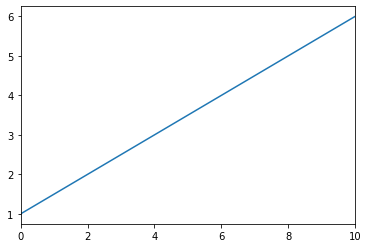

In [ ]:
# Assume the straight line intercept at 1 and have a slope of 0.5

m = np.array([1, 0.5])
d = G.dot(m)

plt.figure()
plt.plot(x, d)
plt.xlim(min(x), max(x))
plt.show()

#### 4.3.2 Quadratic function

The formula for a straight line can easily be generalized to any order polynomial, by simply adding additional model parameters that represent the coefficients of higher power of *x_n*. 

Below examplify a qudratic-cure linear model. 

$$d_i = m_1 + m_2 x_i + m_3 x_i^2$$

Try to edit below code to create a third order polynomial and write in explicit form **d** = **G** **m**

[[1.   0.   0.  ]
 [1.   0.1  0.01]
 [1.   0.2  0.04]
 [1.   0.3  0.09]
 [1.   0.4  0.16]
 [1.   0.5  0.25]
 [1.   0.6  0.36]
 [1.   0.7  0.49]
 [1.   0.8  0.64]
 [1.   0.9  0.81]
 [1.   1.   1.  ]]


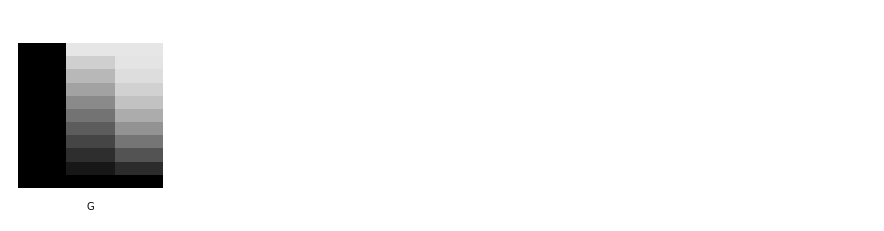

In [ ]:
# eda04_02: data kernel for quadratic-curve linear model

# make the auxillary variable x
N=11;
x = np.zeros((N,1));
x[:,0] = np.linspace(0,1,N);

G = np.zeros((N,3));
# G[:,0] as has size 11, but np.ones((N,1)) and x has size 11x1,
# so a ravel() is required to match size.  (Yuck!)
G[:,0] = np.ones((N,1)).ravel();
G[:,1] = x.ravel();
G[:,2] = np.power(x,2).ravel();

print(G);
eda_draw('title G',G);

#### 4.3.3 Generalize to arbitrary polynomial degreee

Below generalize the data kernal **G** to arbitrary degree N

(32, 32)


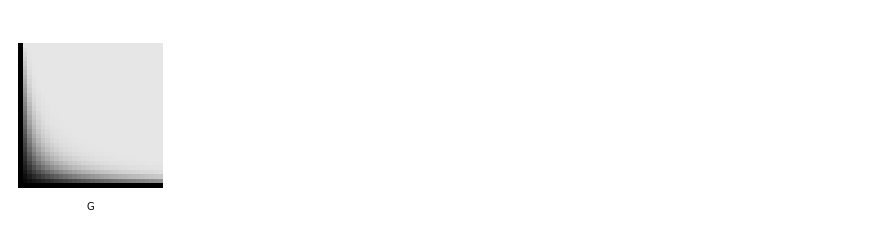

In [ ]:
# eda04_03: data kernel for quadratic-curve linear model

# make the auxillary variable x on varange (0,1)
N=32;
x = np.zeros((N,1));
x[:,0] = np.linspace(0,1,N);
Dx = x[1,0]-x[0,0];

M=N;  # square G

G = np.zeros((N,M));
G[:,0] = np.ones((N,1)).ravel();
for i in range(1,M):
    G[:,i] = np.power(x,i).ravel();

#print(G.shape)
eda_draw('title G',G);

#### 4.3.4 Generalize to arbitrary functions

The linear model is not limited to polynomials but also can  incorperate any curve in the following form.

The data = a sum of functions

$$d_i = m_1f_1(x_i) + m_2f_2(x_i) + ...  + m_Mf_M(x_i)$$





##### 4.3.4.1 Fourier Series

Here we would like to consider a *important* special case -- called *Fourier analysis*. A representation of any function with a sum of cosines and seins of different wavelength $\lambda_i$.

The definition of Fourier series

$$s_N(x) = \frac{a_0}{2}+\sum^N_n\left[ a_n cos \left( \frac{2\pi n x}{P}\right) + b_n sin \left(\frac{2\pi nx}{P} \right) \right] $$

I.e., the data = a sum of cosines and sines

$$ d_i = m_1cos \left(\frac{2\pi x_i}{\lambda_1} \right) + m_2sin \left(\frac{2\pi x_i}{\lambda_1} \right) + ... + m_{M-1}cos \left(\frac{2\pi x_i}{\lambda_{M/2}} \right) +  m_M sin \left(\frac{2\pi x_i}{\lambda_{M/2}} \right) $$

Try to write data kernal **G** explicitly.

The following illustrate computing data kernal using loop and functions.

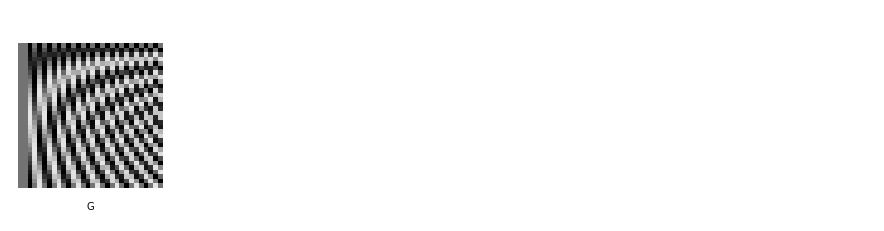

In [ ]:
# eda04_04: data kernel for Fourier sum

# make the auxillary variable x on varange (0,1)
N=32;
x = np.zeros((N,1));
x[:,0] = np.linspace(0,1,N);
Dx = x[1,0]-x[0,0];
xmax = x[N-1,0];

M=N-2;  # G no suqare, since lambda=infinity case is omitted
Mo2 = floor(M/2);

# wavelengths lambda
lam= 2*xmax * np.reciprocal( np.linspace(1,Mo2,Mo2) );

G = np.zeros((N,M));
for i in range(1,Mo2):
    icos = 2*i;
    isin = 2*i+1;
    G[:,icos] = np.cos(2*pi*x/lam[i]).ravel();
    G[:,isin] = np.sin(2*pi*x/lam[i]).ravel();

eda_draw('title G',G);

### 4.4 Mixture as data kernal

The data kernal can also view as a concatenation of its columns, say $c^{(j)}$

the data kernal = a concatentation of column-vectors 

$$ G = \begin{bmatrix} G_{11} & G_{12} & G_{13} \\ G_{21} & G_{22} & G_{23} \\ G_{31} & G_{32} & G_{33}\end{bmatrix} = \left[ \begin{bmatrix} G_{11} \\ G_{21} \\ G_{31} \end{bmatrix}  \begin{bmatrix} G_{12} \\ G_{22} \\ G_{32} \end{bmatrix}  \begin{bmatrix} G_{13} \\ G_{23} \\ G_{33}  \end{bmatrix} \right] = \begin{bmatrix} \mathbf{c}^{(1)} & \mathbf{c}^{(2)} & \mathbf{c}^{(3)} \end{bmatrix}$$

By using the column definition, **d** = **Gm** can be understood as a addition (linear mixture) of column-vectors.

i.e., the data = a linear mixture of column-vectors

$$ \mathbf{d} = m_1 \mathbf{c}^{(1)} + m_2 \mathbf{c}^{(2)} + ... + m_M \mathbf{c}^{(M)}  $$

The summation can be throught of a *mixing* process. The data are a mixture of the columns of the data kernal. Each model parameter represents the amount of the corresponding column-vector in the mixture. For example, suppose a city has *M* major sources of a pollution, such as power plants, industrial facilities, vehicles (taken as a group), and so on. Each source emits into the atmosphere its unique combination of *N* different pollutants. An air sample taken from an arbitary point within the city will then comtain a mixture of pollutants from these sources:

> *Pollutants in air = Mixture of sources*

$$ \begin{bmatrix} \text{pollutant 1 in air} \\ \text{pollutant 2 in air} \\ ...\\ \text{pollutant N in air} \end{bmatrix} = m_1 \begin{bmatrix} \text{pollutant 1 in source 1} \\ \text{pollutant 2 in source 1} \\ ...\\ \text{pollutant N in source 1} \end{bmatrix} + ... + m_M \begin{bmatrix} \text{pollutant 1 in source M} \\ \text{pollutant 2 in source M} \\ ...\\ \text{pollutant N in source M} \end{bmatrix} $$

where the model parameters, $m_j$ , represent the contributions of the j-th source to the pollution at the particular site. *Note that this quantitative model assumes that the pollutants from each source are conseravative.* That there is no loss of the pollutant.

---
The below code shows how to extract the columns from the fourier series.

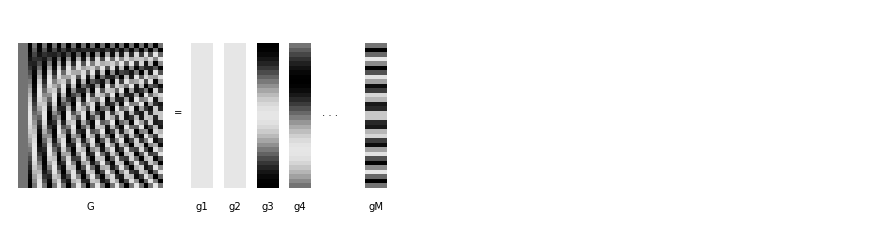

In [ ]:
# eda04_05: data kernel viewed as concatenation of columns

# make the auxillary variable x on varange (0,1)
N=32;
x = np.zeros((N,1));
x[:,0] = np.linspace(0,1,N);
Dx = x[1,0]-x[0,0];
xmax = x[N-1,0];

M=N-2;  # G no suqare, since lambda=infinity case is omitted
Mo2 = floor(M/2);

# wavelengths lambda
lam= 2*xmax * np.reciprocal( np.linspace(1,Mo2,Mo2) );

G = np.zeros((N,M));
for i in range(1,Mo2):
    icos = 2*i;
    isin = 2*i+1;
    G[:,icos] = np.cos(2*pi*x/lam[i]).ravel();
    G[:,isin] = np.sin(2*pi*x/lam[i]).ravel();
    
g1 = np.copy( G[:,0] );
g2 = np.copy( G[:,1] );
g3 = np.copy( G[:,2] );
g4 = np.copy( G[:,3] );
gM = np.copy( G[:,M-1] );

eda_draw('title G',G,'=','title g1',g1,'title g2',g2,'title g3',g3,'title g4',g4,'. . .','title gM',gM);

### 4.5 Weighted averages



#### 4.5.1 Weighted averages



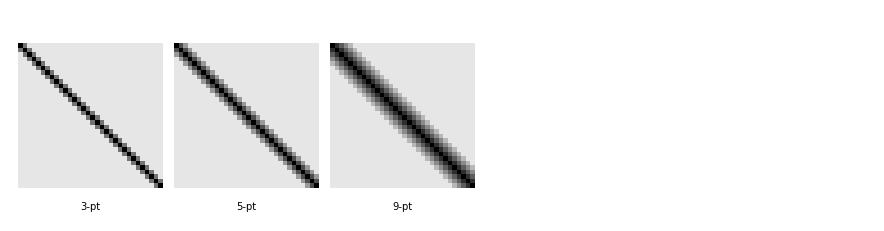

In [ ]:
# eda04_06: data kernel fro three point weighted avarage

N=32;
M=N; # G is square

# case 1: 3-point average

# symmetric averaging with weights w, where w[0,0] is the central weight
Lw = 2;
w = np.zeros((Lw,1));
w[:,0] = [2,1];

# normalization, to ensure row sums are unity
n = 2*np.sum(w)-w[0];
w = w/n;

# construct data kernel
r = np.zeros((N,1));
c = np.zeros((M,1));
r[0:Lw,0]=w.ravel();
c[0:Lw,0]=w.ravel();
G3 = la.toeplitz(r,c.T);

# case 2: 5-point average

# symmetric averaging with weights w, where w[0,0] is the central weight
Lw = 3;
w = np.zeros((Lw,1));
w[:,0] = [3,2,1];

# normalization, to ensure row sums are unity
n = 2*np.sum(w)-w[0];
w = w/n;

# construct data kernel
r = np.zeros((N,1));
c = np.zeros((M,1));
r[0:Lw,0]=w.ravel();
c[0:Lw,0]=w.ravel();
G5 = la.toeplitz(r,c.T);

# case 3: 5-point average

# symmetric averaging with weights w, where w[0,0] is the central weight
Lw = 5;
w = np.zeros((Lw,1));
w[:,0] = [5,4,3,2,1];

# normalization, to ensure row sums are unity
n = 2*np.sum(w)-w[0];
w = w/n;

# construct data kernel
r = np.zeros((N,1));
c = np.zeros((M,1));
r[0:Lw,0]=w.ravel();
c[0:Lw,0]=w.ravel();
G9 = la.toeplitz(r,c.T);

eda_draw('title 3-pt',G3,'title 5-pt',G5,'title 9-pt',G9);



#### 4.5.2 Causal filter

### 4.6 Examining Error

Suppose we have some estimated model parameters $M^{est}$. Here we have to exam the differences from the predicted data $d^{pre}$ and the observed data $d^{obs}$.

Lets define an error vector **e**:

$$e = d^{obs} - d^{pre} = d^{obs} - Gm^{est}$$

And the total error is defined as:
$$ E = \mathbf{e}^T\mathbf{e} = [d^{obs} - Gm^{est}]^T[d^{obs} - Gm^{est}]$$
or
$$ E = \sum^N_{i=1}e^2_i$$

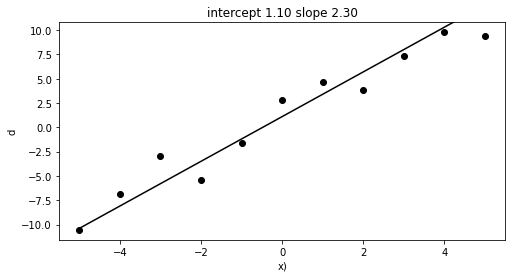

In [ ]:
# eda04_07
# reads in noisy, linear data from file
#  and computes and plots prediction error for a particular
# choice of intercept and slope, m1 and m2

# model paramerters are intercept and slope
M=2;
m = np.zeros((M,1));
m[:,0] = [1.1, 2.3];

# load data from file
T = np.genfromtxt('data/linedata01.txt', delimiter='\t')
[N, K]=T.shape;
x = np.zeros((N,1));
x[:,0] = T[:,0];
dobs = np.zeros((N,1));
dobs[:,0] = T[:,1];

# linear data kernel
G = np.zeros((N,2));
G[:,0] = np.ones((N,1)).ravel();
G[:,1] = x.ravel();
dpre = np.matmul(G,m);

#  plot data
fig1 = plt.figure(1,figsize=(8,4));
ax1 = plt.subplot(1,1,1);
plt.axis([1.1*np.min(x), 1.1*np.max(x), 1.1*np.min(dobs), 1.1*np.max(dobs)])
plt.plot(x,dobs,'ko');
plt.plot(x,dpre,'k-');
plt.xlabel('x)');
plt.ylabel('d');
titlestr = "intercept %.2f slope %.2f" % (m[0,0], m[1,0]);
plt.title(titlestr);
plt.show();

#### 4.6.1 Grid search method to find the best solution

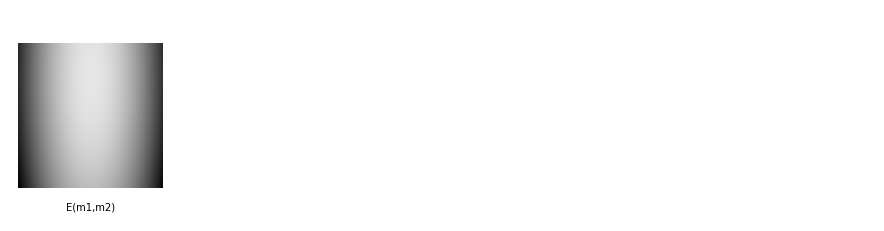

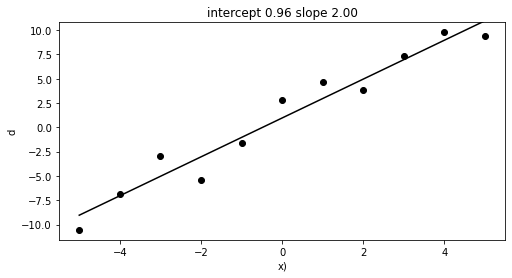

In [ ]:
# eda04_08: grid search for intersept and slope
# for problem of fittng straight line to noisy data

# model paramerters
M=2;
m = np.zeros((M,1));

# load data from file
T = np.genfromtxt('data/linedata01.txt', delimiter='\t')
[N, K]=T.shape;
x = np.zeros((N,1));
x[:,0] = T[:,0];
dobs = np.zeros((N,1));
dobs[:,0] = T[:,1];

# linear data kernel
G = np.zeros((N,2));
G[:,0] = np.ones((N,1)).ravel();
G[:,1] = x.ravel();
dpre = np.matmul(G,m);

# define grid of intercepts and slopes
L1 = 101;
L2 = 101;
m1min=0;
m1max=4;
m2min=0;
m2max=4;
m1= np.zeros((L1,1));
m1[:,0] = np.linspace(m1min,m1max,L1);
m2= np.zeros((L2,1));
m2[:,0] = np.linspace(m2min,m2max,L2);
e = np.zeros((N,1));
E = np.zeros((L1,L2));

for i in range(L1):
    for j in range(L2):
        m[:,0] = [m1[i], m2[j]];
        dpre = np.matmul(G,m);
        e[:,0] = (dobs-dpre).ravel();
        E[i,j] = np.matmul(e.T,e);

# best estimate is the one with smallest error
k = np.argmin( E, axis=0 );
Etemp = np.min( E, axis=0 );
j = np.argmin(Etemp);
i=k[j];
Ebest = E[i,j];
mbest = np.zeros((M,1));
mbest[:,0] = [ m1[i,0],  m2[j,0] ];
dpre = np.matmul(G,mbest);

eda_draw('title E(m1,m2)',E);

#  plot data
fig2 = plt.figure(2,figsize=(8,4));
ax1 = plt.subplot(1,1,1);
plt.axis([1.1*np.min(x), 1.1*np.max(x), 1.1*np.min(dobs), 1.1*np.max(dobs)])
plt.plot(x,dobs,'ko');
plt.plot(x,dpre,'k-');
plt.xlabel('x)');
plt.ylabel('d');
titlestr = "intercept %.2f slope %.2f" % (mbest[0,0], mbest[1,0]);
plt.title(titlestr);
plt.show();



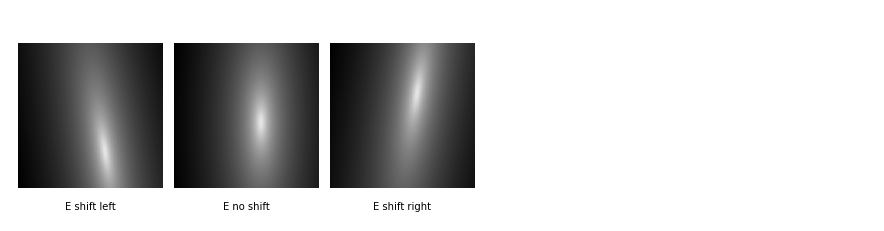

In [ ]:
# eda04_09: grid search for intersept and slope
# for problem of fittng straight line to noisy data

# model paramerters
M=2;
m = np.zeros((M,1));

# load data from file
T = np.genfromtxt('data/linedata01.txt', delimiter='\t')
[N, K]=T.shape;
x = np.zeros((N,1));
x[:,0] = T[:,0];
dobs = np.zeros((N,1));
dobs[:,0] = T[:,1];

# Part 1: shift left
xshift=-2;
xs = np.zeros((N,1));
xs[:,0] = (x+xshift).ravel();

# linear data kernel
G = np.zeros((N,2));
G[:,0] = np.ones((N,1)).ravel();
G[:,1] = xs.ravel();
dpre = np.matmul(G,m);

# define grid of intercepts and slopes
L1 = 101;
L2 = 101;
m1min=-10;
m1max=10;
m2min=-10;
m2max=10;
m1= np.zeros((L1,1));
m1[:,0] = np.linspace(m1min,m1max,L1);
m2= np.zeros((L2,1));
m2[:,0] = np.linspace(m2min,m2max,L2);
e = np.zeros((N,1));
E = np.zeros((L1,L2));

for i in range(L1):
    for j in range(L2):
        m[:,0] = [m1[i], m2[j]];
        dpre = np.matmul(G,m);
        e[:,0] = (dobs-dpre).ravel();
        E0 = np.matmul(e.T,e);
        E[i,j] = E0;
    
# best estimate is the one with smallest error
k = np.argmin( E, axis=0 );
Etemp = np.min( E, axis=0 );
j = np.argmin(Etemp);
i=k[j];
Ebest = E[i,j];
mbest = np.zeros((M,1));
mbest[:,0] = [ m1[i,0],  m2[j,0] ];
dpre = np.matmul(G,mbest);
Esl = E;


# Part 2: no shift 
xshift=0;
xs = np.zeros((N,1));
xs[:,0] = (x+xshift).ravel();

# linear data kernel
G = np.zeros((N,2));
G[:,0] = np.ones((N,1)).ravel();
G[:,1] = xs.ravel();
dpre = np.matmul(G,m);

# define grid of intercepts and slopes
L1 = 101;
L2 = 101;
m1min=-10;
m1max=10;
m2min=-10;
m2max=10;
m1= np.zeros((L1,1));
m1[:,0] = np.linspace(m1min,m1max,L1);
m2= np.zeros((L2,1));
m2[:,0] = np.linspace(m2min,m2max,L2);
e = np.zeros((N,1));
E = np.zeros((L1,L2));

for i in range(L1):
    for j in range(L2):
        m[:,0] = [m1[i], m2[j]];
        dpre = np.matmul(G,m);
        e[:,0] = (dobs-dpre).ravel();
        E0 = np.matmul(e.T,e);
        E[i,j] = E0;
    
# best estimate is the one with smallest error
k = np.argmin( E, axis=0 );
Etemp = np.min( E, axis=0 );
j = np.argmin(Etemp);
i=k[j];
Ebest = E[i,j];
mbest = np.zeros((M,1));
mbest[:,0] = [ m1[i,0],  m2[j,0] ];
dpre = np.matmul(G,mbest);
Ens = E;

# Part 3: shift right
xshift=2;
xs = np.zeros((N,1));
xs[:,0] = (x+xshift).ravel();

# linear data kernel
G = np.zeros((N,2));
G[:,0] = np.ones((N,1)).ravel();
G[:,1] = xs.ravel();
dpre = np.matmul(G,m);

# define grid of intercepts and slopes
L1 = 101;
L2 = 101;
m1min=-10;
m1max=10;
m2min=-10;
m2max=10;
m1= np.zeros((L1,1));
m1[:,0] = np.linspace(m1min,m1max,L1);
m2= np.zeros((L2,1));
m2[:,0] = np.linspace(m2min,m2max,L2);
e = np.zeros((N,1));
E = np.zeros((L1,L2));

for i in range(L1):
    for j in range(L2):
        m[:,0] = [m1[i], m2[j]];
        dpre = np.matmul(G,m);
        e[:,0] = (dobs-dpre).ravel();
        E0 = np.matmul(e.T,e);
        E[i,j] = E0;
    
# best estimate is the one with smallest error
k = np.argmin( E, axis=0 );
Etemp = np.min( E, axis=0 );
j = np.argmin(Etemp);
i=k[j];
Ebest = E[i,j];
mbest = np.zeros((M,1));
mbest[:,0] = [ m1[i,0],  m2[j,0] ];
dpre = np.matmul(G,mbest);
Esr = E;

# lake log of error to reduce range of variation for plotting purposes
eda_draw('title E shift left',np.log(Esl),'title E no shift',np.log(Ens),'title E shift right',np.log(Esr));

### 4.7 Least squares to estimate model parameters

intercept 0.941 +/- 0.974 (%95)
slope     2.019 +/- 0.308 (%95)


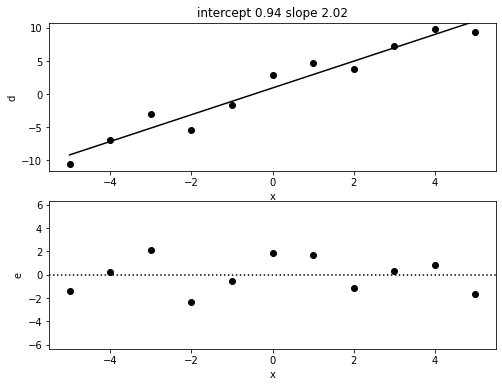

In [ ]:
# eda04_10: least-squares for straight line fit

# model paramerters
M=2;
mest = np.zeros((M,1));

# load data from file
T = np.genfromtxt('data/linedata01.txt', delimiter='\t')
[N, K]=T.shape;
x = np.zeros((N,1));
x[:,0] = T[:,0];
dobs = np.zeros((N,1));
dobs[:,0] = T[:,1];

# linear data kernel
G = np.zeros((N,2));
G[:,0] = np.ones((N,1)).ravel();
G[:,1] = x.ravel();

# siple least squares solution
GTG = np.matmul(G.T,G);
mest = a3 = la.solve( GTG, np.matmul(G.T, dobs)  );

# eda04_10: variance calculation
dpre = np.matmul(G, mest); # predicted data
e = dobs - dpre;           # error
E = np.matmul(e.T,e);      # total error
sigmad2 = E/(N-M);         # posterior varaince of data
Cm = sigmad2*la.inv(GTG);  # variance of model parameters
sigmam1 = sqrt( Cm[0,0] ); # sqrt variance of model parameter 1
sigmam2 = sqrt( Cm[1,1] ); # sqrt variance of model parameter 2

# print model parameters and theoir 95% confidence intervals
str1 = "intercept %.3f +/- %.3f (%%95)" % (mest[0,0],2*sigmam1);
str2 = "slope     %.3f +/- %.3f (%%95)" % (mest[1,0],2*sigmam2);
print(str1);
print(str2);

#  plot data
fig2 = plt.figure(2,figsize=(8,6));
ax1 = plt.subplot(2,1,1);
plt.axis([1.1*np.min(x), 1.1*np.max(x), 1.1*np.min(dobs), 1.1*np.max(dobs)])
plt.plot(x,dobs,'ko');
plt.plot(x,dpre,'k-');
plt.xlabel('x');
plt.ylabel('d');
titlestr = "intercept %.2f slope %.2f" % (mest[0,0], mest[1,0]);
plt.title(titlestr);
#  plot error, with different vertical scale
ax2 = plt.subplot(2,1,2);
plt.axis([1.1*np.min(x), 1.1*np.max(x), -3*np.amax(e), 3*np.amax(e)])
plt.plot(x,e,'ko');
plt.plot( [1.1*np.min(x), 1.1*np.max(x)],[0,0],'k:');
plt.xlabel('x');
plt.ylabel('e');
plt.show();


### 4.8 (eda04_11) Modeling the secular trend and annual cycles in black rock forest data

slope -8.590021e-05 +/- 1.251757e-05  C per day (95%)
slope -3.137505e-02 +/- 4.572041e-03  C per year (95%)


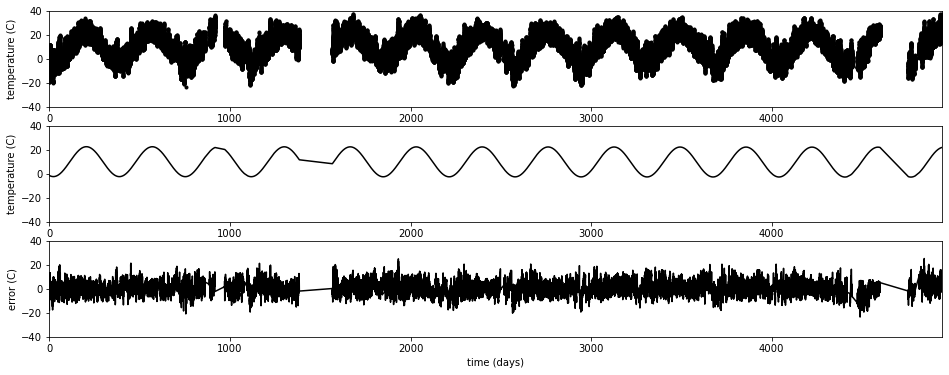

In [ ]:
# eda04_11 least squares for secular trend and annual cycles in black rock forest data

# load data from file
D = np.genfromtxt('data/brf_temp.txt', delimiter='\t')
[Nraw, K]=np.shape(D);
traw = np.zeros((Nraw,1));
traw[:,0] = D[:,0];
draw = np.zeros((Nraw,1));
draw[:,0] = D[:,1];

# select only good data
k = np.where( (draw[:,0]!=0)&(draw[:,0]>-40)&(draw[:,0]<38) );
(K,N)=np.shape(k);
t = np.zeros((N,1));
t[:,0] = traw[k].ravel();
dobs = np.zeros((N,1));
dobs[:,0] = draw[k].ravel();

Ty = 365.25;
M= 4;
G = np.zeros((N,M));
G[:,0] = np.ones( (N,1) ).ravel();
G[:,1] = t.ravel();
G[:,2] = np.cos(2*pi*t/Ty).ravel();
G[:,3] = np.sin(2*pi*t/Ty).ravel();

# siple least squares solution
GTG = np.matmul(G.T,G);
mest = la.solve( GTG, np.matmul(G.T, dobs)  );

# eda04_10: variance calculation
dpre = np.matmul(G, mest); # predicted data
e = dobs - dpre;           # error
E = np.matmul(e.T,e);      # total error
sigmad2 = E/(N-M);         # posterior varaince of data
Cm = sigmad2*la.inv(GTG);  # variance of model parameters
sigmam1 = sqrt( Cm[0,0] ); # sqrt variance of model parameter 1
sigmam2 = sqrt( Cm[1,1] ); # sqrt variance of model parameter 2
sigmam3 = sqrt( Cm[2,2] ); # sqrt variance of model parameter 3
sigmam4 = sqrt( Cm[3,3] ); # sqrt variance of model parameter 4

# write out slope and its confidence
slopestr1 = "slope %e +/- %e  C per day (95%%)" % (mest[1,0], sigmam2);
print(slopestr1);

# convert to per year
slopestr2 = "slope %e +/- %e  C per year (95%%)" % (Ty*mest[1,0], Ty*sigmam2);
print(slopestr2);

#  plot data
fig1 = plt.figure(1,figsize=(16,6));
ax1 = plt.subplot(3,1,1);
plt.axis([t[0,0], t[N-1,0], -40, 40])
plt.plot(t,dobs,'k.');
plt.xlabel('time (days)');
plt.ylabel('temperature (C)');
ax2 = plt.subplot(3,1,2);
plt.axis([t[0,0], t[N-1,0], -40, 40])
plt.plot(t,dpre,'k-');
plt.xlabel('time (days)');
plt.ylabel('temperature (C)');
ax3 = plt.subplot(3,1,3);
plt.axis([t[0,0], t[N-1,0], -40, 40])
plt.plot(t,e,'k-');
plt.xlabel('time (days)');
plt.ylabel('error (C)');
